# Career Con Competition
Robots are smart… by design. To fully understand and properly navigate a task, however, they need input about their environment.

In this competition, you’ll help robots recognize the floor surface they’re standing on using data collected from Inertial Measurement Units (IMU sensors).

We’ve collected IMU sensor data while driving a small mobile robot over different floor surfaces on the university premises. The task is to predict which one of the nine floor types (carpet, tiles, concrete) the robot is on using sensor data such as acceleration and velocity. Succeed and you'll help improve the navigation of robots without assistance across many different surfaces, so they won’t fall down on the job.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
dfX = pd.read_csv('X_train.csv')
dfY = pd.read_csv('y_train.csv')

In [0]:
# constructing the all data dataframe 
df = pd.merge(dfX, dfY, on='series_id', how='inner')

In [15]:
df.columns

Index(['row_id', 'series_id', 'measurement_number', 'orientation_X',
       'orientation_Y', 'orientation_Z', 'orientation_W', 'angular_velocity_X',
       'angular_velocity_Y', 'angular_velocity_Z', 'linear_acceleration_X',
       'linear_acceleration_Y', 'linear_acceleration_Z', 'group_id',
       'surface'],
      dtype='object')

# EDA

In [30]:
df.tail()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
63090,492_114,492,114,-0.88473,0.44091,0.059968,-0.13878,-0.029835,-0.047991,0.068823,1.60160,1.3644,-13.8730,32,concrete
63091,492_115,492,115,-0.88473,0.44097,0.059943,-0.13861,0.130310,-0.047846,0.031960,0.66758,1.7252,-11.6600,32,concrete
63092,492_116,492,116,-0.88474,0.44100,0.059952,-0.13844,0.123530,-0.071546,0.010923,1.56740,3.8538,-6.8930,32,concrete
63093,492_117,492,117,-0.88462,0.44113,0.060179,-0.13869,-0.032604,-0.083517,-0.017443,-0.49067,3.6187,-5.3916,32,concrete
63094,492_118,492,118,-0.88460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,concrete


In [0]:
# data for EDA
df_vis = df.drop(['row_id', 'series_id', 'group_id', 'measurement_number'], axis = 1)

In [58]:
df_vis.shape

(63094, 11)

In [21]:
df_vis.describe()

,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,63095.000000,63094.000000,63094.000000,63094.000000,63094.000000,63094.000000,63094.000000,63094.000000,63094.000000,63094.000000
mean,0.044569,-0.170760,-0.025591,0.008124,0.001002,0.008477,-0.021839,0.136812,2.922450,-9.356005
std,0.681399,0.694272,0.104799,0.104177,0.095023,0.071020,0.171336,1.576227,1.966827,2.252869
min,-0.988600,-0.989400,-0.162830,-0.153450,-0.817550,-0.817440,-1.244500,-29.895000,-35.109000,-49.403000
25%,-0.639150,-0.858218,-0.127340,-0.094120,-0.031761,-0.024642,-0.077932,-0.404752,2.095425,-9.992375
50%,0.110260,-0.418750,-0.057189,0.010994,0.000431,0.006163,-0.005273,0.123405,2.918100,-9.356250
75%,0.800710,0.438308,0.060961,0.122670,0.035187,0.041818,0.053070,0.668325,3.736675,-8.701300
max,0.989100,0.988930,0.155710,0.151740,0.926990,0.936190,1.125700,19.838000,24.108000,18.193000


In [22]:
df_vis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63095 entries, 0 to 63094
Data columns (total 11 columns):
orientation_X            63095 non-null float64
orientation_Y            63094 non-null float64
orientation_Z            63094 non-null float64
orientation_W            63094 non-null float64
angular_velocity_X       63094 non-null float64
angular_velocity_Y       63094 non-null float64
angular_velocity_Z       63094 non-null float64
linear_acceleration_X    63094 non-null float64
linear_acceleration_Y    63094 non-null float64
linear_acceleration_Z    63094 non-null float64
surface                  63095 non-null object
dtypes: float64(10), object(1)
memory usage: 5.8+ MB


In [25]:
labels = df_vis['surface'].unique()
print(labels)

['fine_concrete' 'concrete' 'soft_tiles' 'tiled' 'soft_pvc'
 'hard_tiles_large_space' 'carpet' 'hard_tiles' 'wood']


In [0]:
# searching for missing data
df_vis.isnull().sum()

In [0]:
index_missing = df_vis.isnull().any(axis=1).values.argmax()

In [0]:
df_vis = df_vis.drop([index_missing], axis = 0)

In [0]:
# confirming the result
df_vis.isnull().sum()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


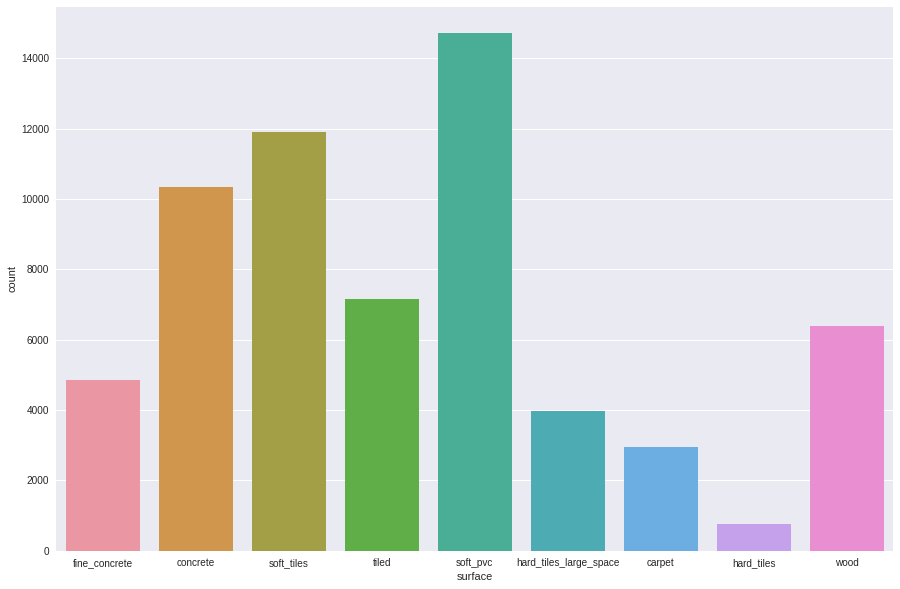

In [57]:
plt.figure(figsize = (15,10))
sns.countplot(x= 'surface', data = df_vis)

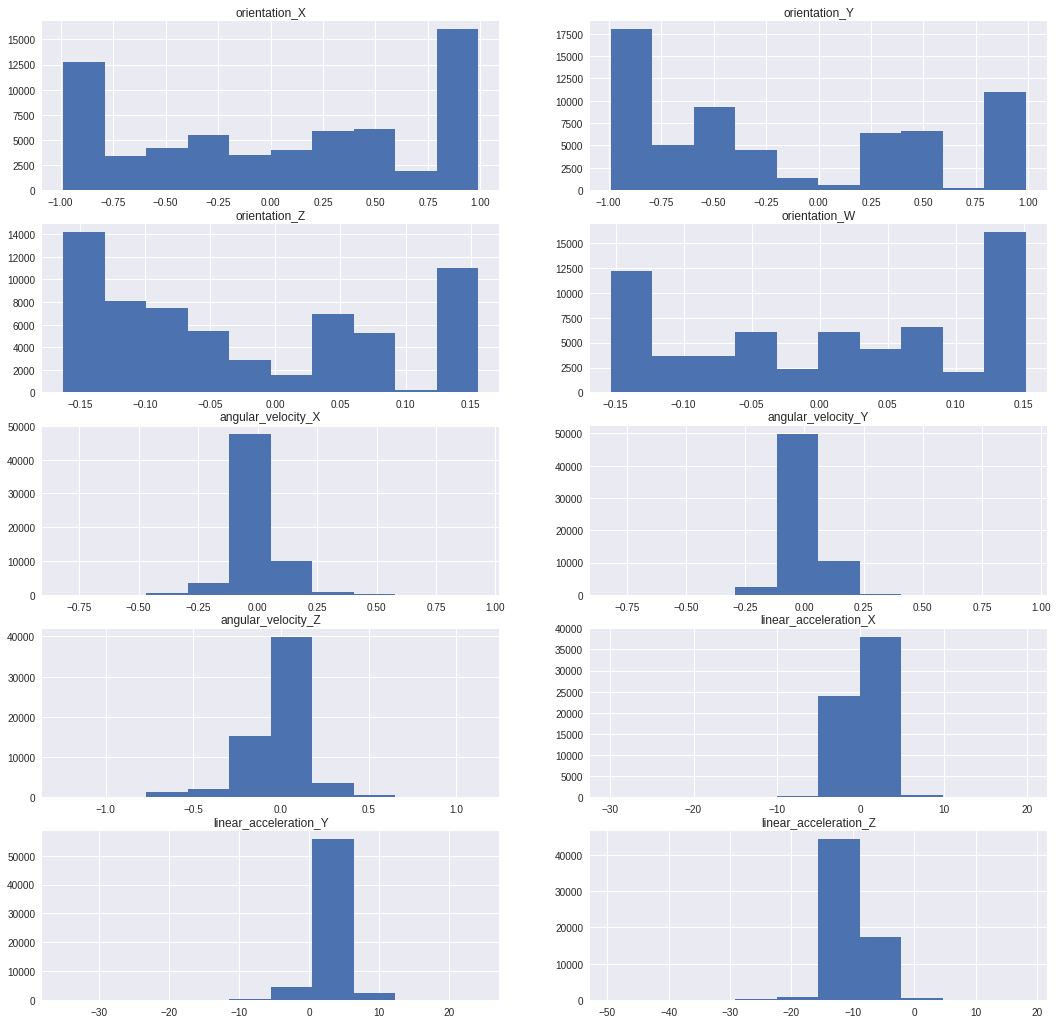

In [66]:
# ploting distribution
fig = plt.figure(figsize = (18,18))
for i in range(10):
  ax = fig.add_subplot(5, 2, i+1)
  ax.set_title(df_vis.columns[i])
  ax.hist(df_vis.iloc[:,i])

In [0]:
# try to see the correlation
df_vis.corrwith(df_vis.surface).plot.bar(figsize = (20,10), grid = True, title = 'Correlation with Surface Variable')

In [0]:
correlations = df_vis.corr()

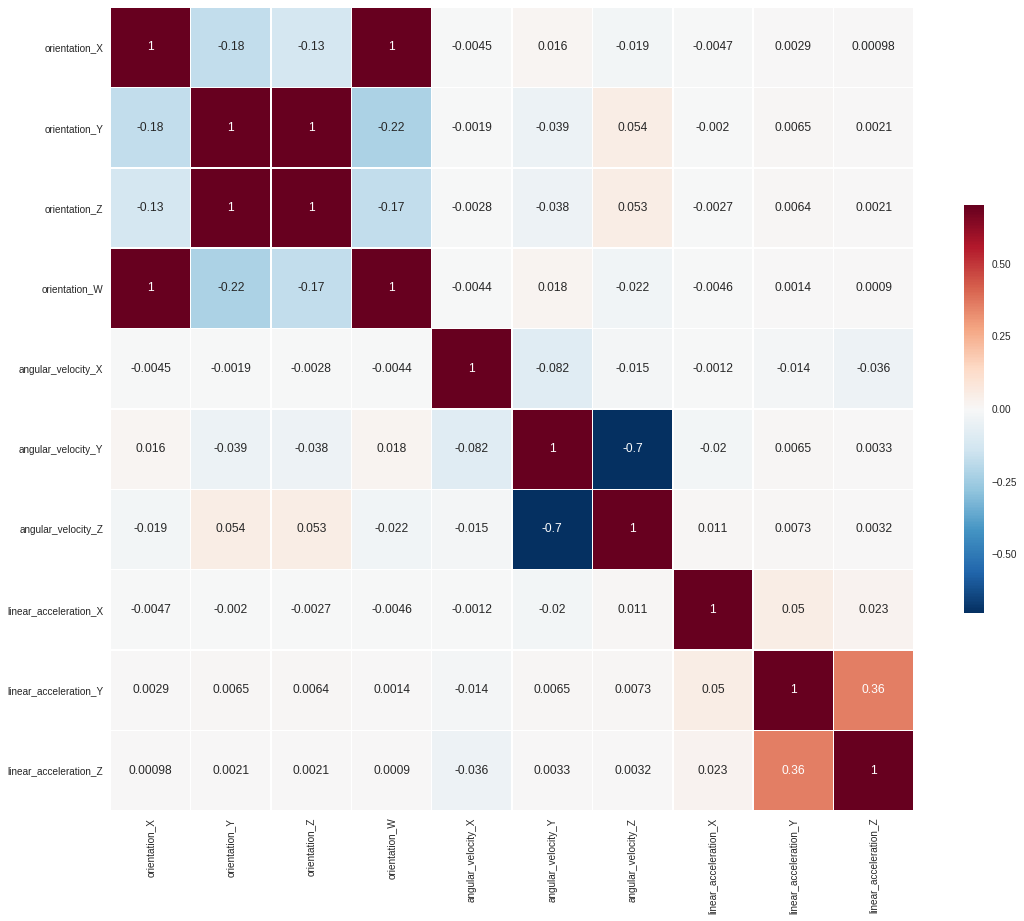

In [78]:
plt.figure(figsize = (18,15))
sns.heatmap(correlations, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

## Data preprocessing

In [0]:
X = df_vis.iloc[:, :-1]
y = df_vis.iloc[:, -1]

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [96]:
x_train.shape

(44165, 10)

In [0]:
# scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [106]:
# do some features importance with random_forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
names = df_vis.columns.values
# Fit the model
rfc.fit(X, y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.2214, 'orientation_X'), (0.2073, 'orientation_W'), (0.1989, 'orientation_Y'), (0.1696, 'orientation_Z'), (0.0958, 'angular_velocity_Z'), (0.0432, 'angular_velocity_Y'), (0.0211, 'linear_acceleration_Z'), (0.0199, 'linear_acceleration_X'), (0.0134, 'angular_velocity_X'), (0.0095, 'linear_acceleration_Y')]


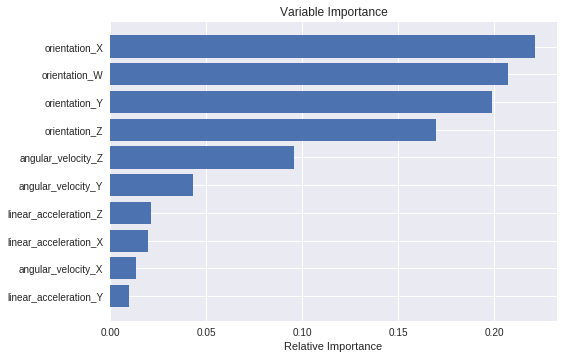

In [107]:
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(names)-1) + 0.5

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

# Models Building

In [0]:
# making evaluation
plt.figure(figsize = (10,10))
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
def evaluate(clf):
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    cm = confusion_matrix(y_test, y_pred)
    print("The Scores for {} are: Accuracy of {}, F1 of {} and CM".format(type(clf).__name__, accuracy, f1))
    sns.heatmap(cm, annot = True , fmt='g')

In [113]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 200)
clf_lr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

The Scores for LogisticRegression are: Accuracy of 0.4914681177029954, F1 of 0.4308028140375642 and CM


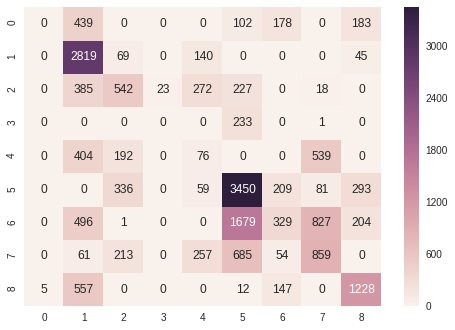

In [118]:
evaluate(clf_lr)

In [134]:
from sklearn.svm import SVC
clf_svm = SVC(kernel='rbf', C = 200.0)
clf_svm.fit(x_train,y_train)

SVC(C=200.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

The Scores for SVC are: Accuracy of 0.9483860742775635, F1 of 0.9482749372174887 and CM


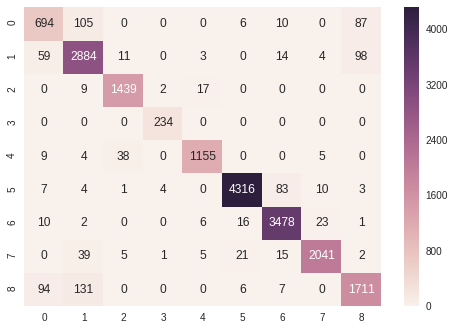

In [135]:
evaluate(clf_svm)
# best for C of 200 and Kenrel of rbf

In [136]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Scores for DecisionTreeClassifier are: Accuracy of 0.9911247292514132, F1 of 0.9911254455249188 and CM


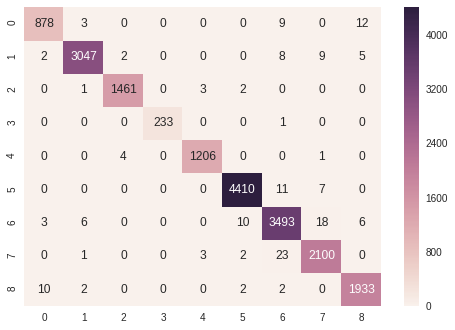

In [137]:
evaluate(clf_dt)

In [138]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

The Scores for RandomForestClassifier are: Accuracy of 0.9963019705214221, F1 of 0.9963030895842503 and CM


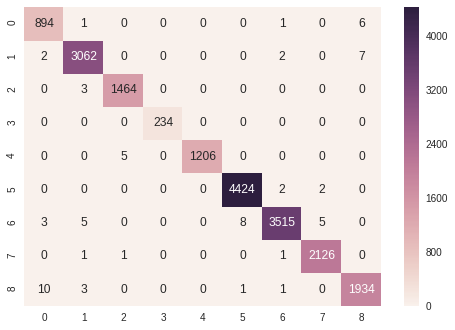

In [139]:
evaluate(clf_rf)

In [140]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
clf_ab = AdaBoostClassifier(n_estimators=100, learning_rate=0.3)
clf_ab.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.3, n_estimators=100, random_state=None)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The Scores for AdaBoostClassifier are: Accuracy of 0.31628717840350784, F1 of 0.2691907870196008 and CM


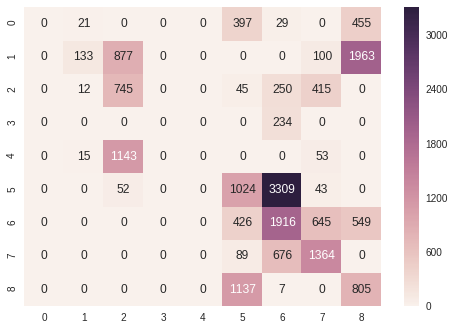

In [141]:
evaluate(clf_ab)

In [143]:
clf_bg = BaggingClassifier()
clf_bg.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

The Scores for BaggingClassifier are: Accuracy of 0.9944001267895821, F1 of 0.9944022675779113 and CM


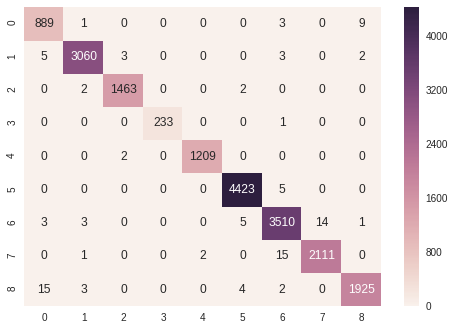

In [144]:
evaluate(clf_bg)

In [145]:
from sklearn.naive_bayes import BernoulliNB
clf_bnb = BernoulliNB()
clf_bnb.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The Scores for BernoulliNB are: Accuracy of 0.3927835596175181, F1 of 0.34419523597673557 and CM


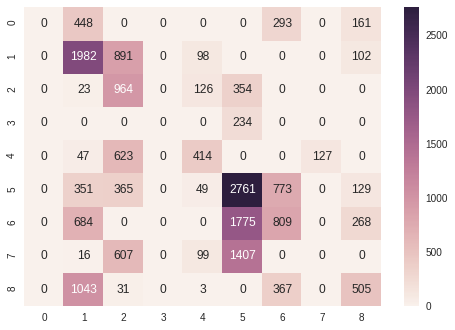

In [146]:
evaluate(clf_bnb)

In [147]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(100)
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

The Scores for KNeighborsClassifier are: Accuracy of 0.7504358391885467, F1 of 0.7346721570924899 and CM


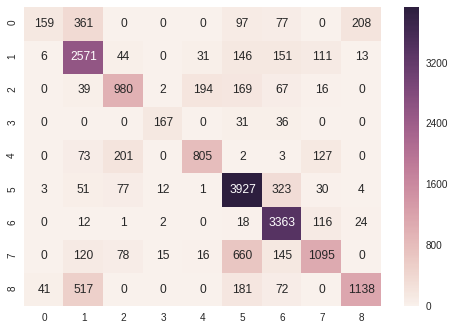

In [148]:
evaluate(clf_knn)